# Random Forest (Credit Card Fraud Prediction)

## Explanation

### Objective

create a machine learning model that can predict whether a credit card is a fraud or not, using the Random Forest algorithm.

### Column Descriptions

- ***transaction_id***      = Unique identifier for each transaction
- ***amount***              = Transaction amount
- ***transaction_hour***    = Hour of transaction (0–23)
- ***merchant_category***   = Type of merchant
- ***foreign_transaction*** = Indicates if transaction is international (0/1)
- ***location_mismatch***   = Billing vs transaction location mismatch (0/1)
- ***device_trust_score***  = Trust score of the device (0–100)
- ***velocity_last_24h***   = Number of transactions in last 24 hours
- ***cardholder_age***      = Age of the cardholder
- ***is_fraud***            = Target variable (0 = Normal, 1 = Fraud) 

## A. Data Preparation

### A.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [2]:
try:
    df = pd.read_csv("credit_card_fraud_10k.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [3]:
df.shape

(10000, 10)

### A.4 Viewing Data Informations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


### A.5 Viewing Data Statistics

In [ ]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
transaction_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
amount,10000.00,175.95,175.39,0.00,50.91,122.09,242.48,1471.04
transaction_hour,10000.00,11.59,6.92,0.00,6.00,12.00,18.00,23.00
foreign_transaction,10000.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
location_mismatch,10000.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00
device_trust_score,10000.00,61.80,21.49,25.00,43.00,62.00,80.00,99.00
velocity_last_24h,10000.00,2.01,1.43,0.00,1.00,2.00,3.00,9.00
cardholder_age,10000.00,43.47,14.98,18.00,30.00,44.00,56.00,69.00
is_fraud,10000.00,0.02,0.12,0.00,0.00,0.00,0.00,1.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [6]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [7]:
df.tail()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
9995,9996,350.91,22,Food,0,0,99,4,37,0
9996,9997,410.04,5,Clothing,0,0,70,3,25,0
9997,9998,527.75,21,Electronics,0,0,44,2,45,0
9998,9999,91.20,2,Electronics,0,0,38,0,37,0
9999,10000,44.06,2,Clothing,0,0,38,0,66,0


### A.7 Viewing Duplicated Data

In [8]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [9]:
df.isna().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

### A.9 Viewing Outlier Data

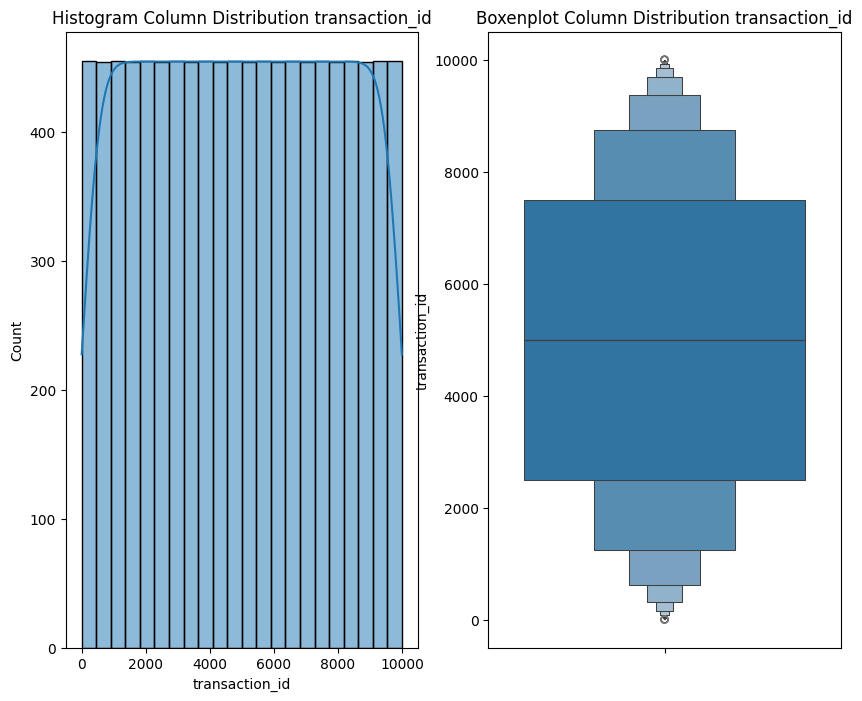

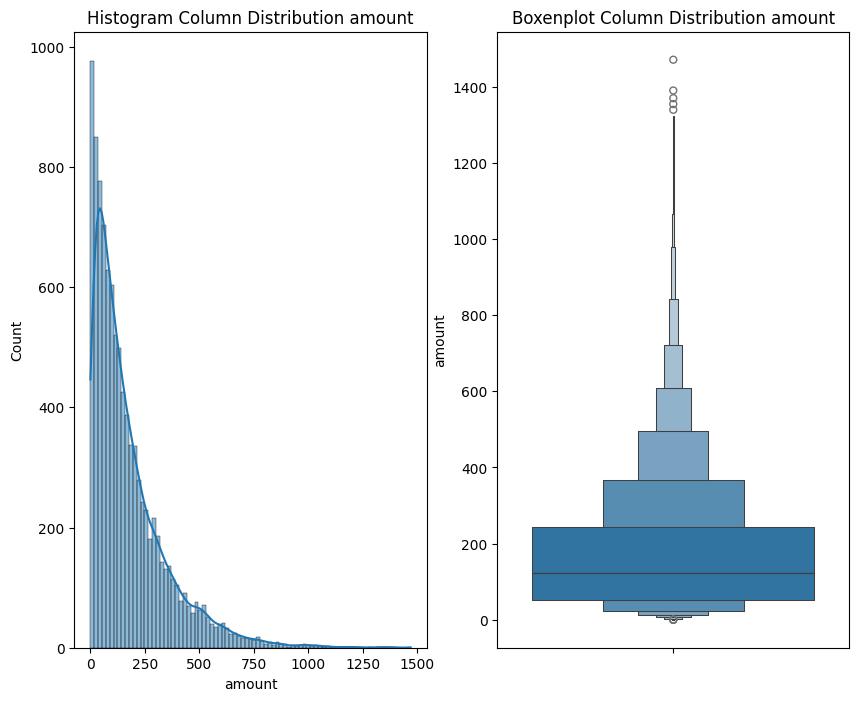

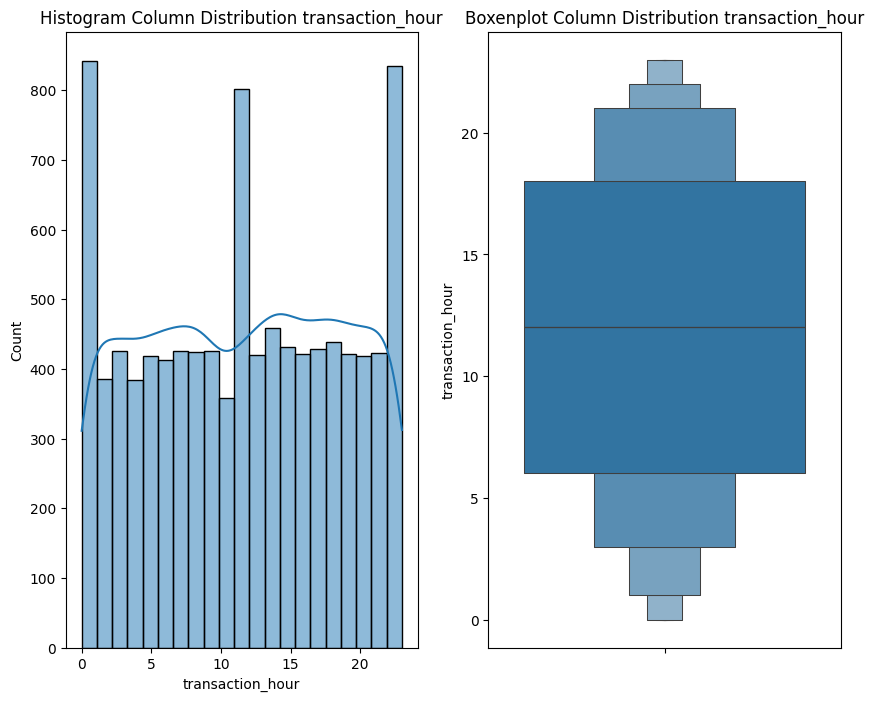

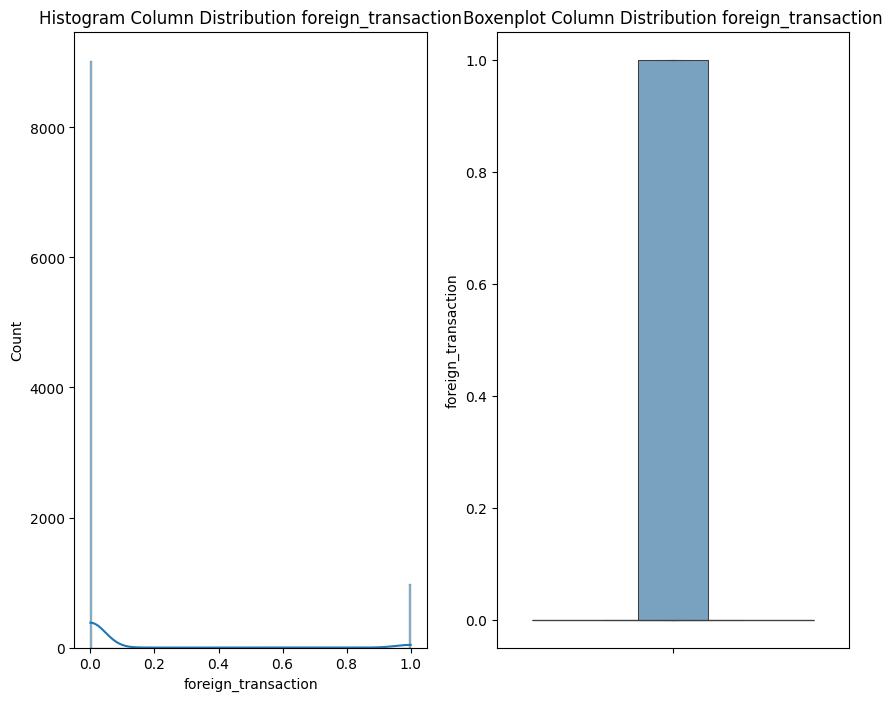

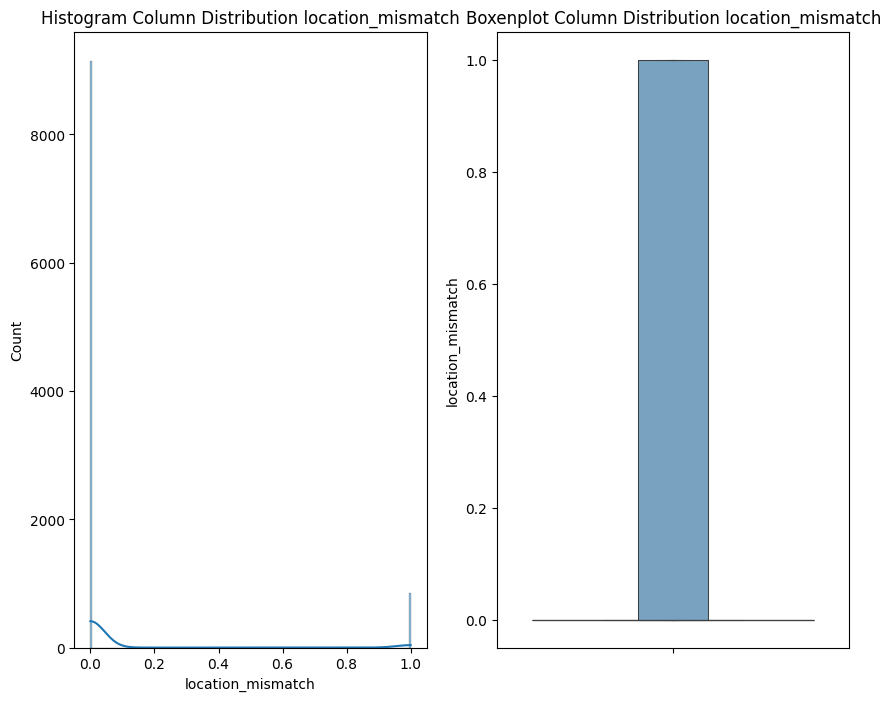

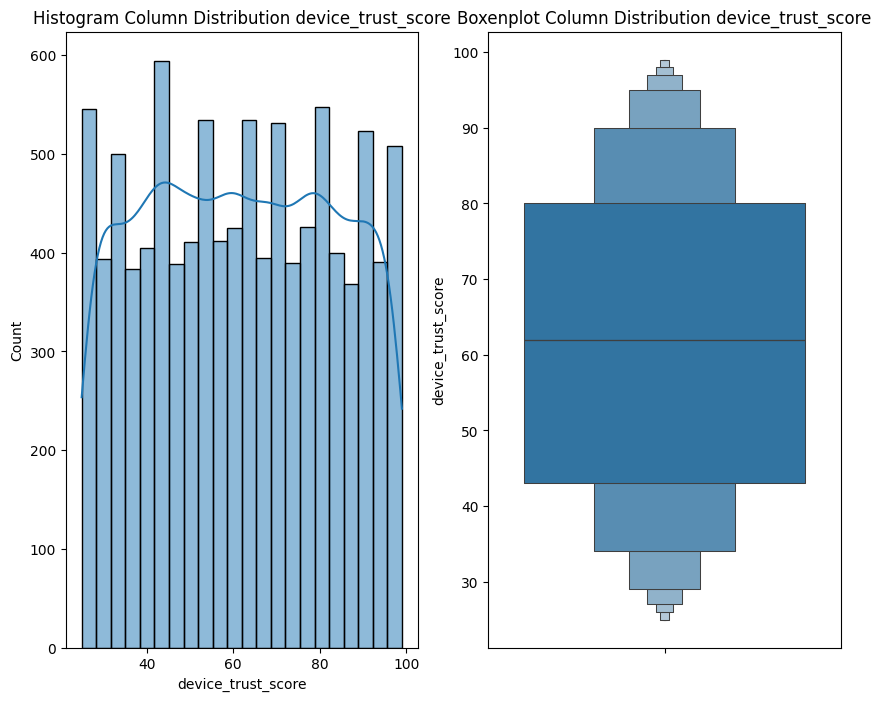

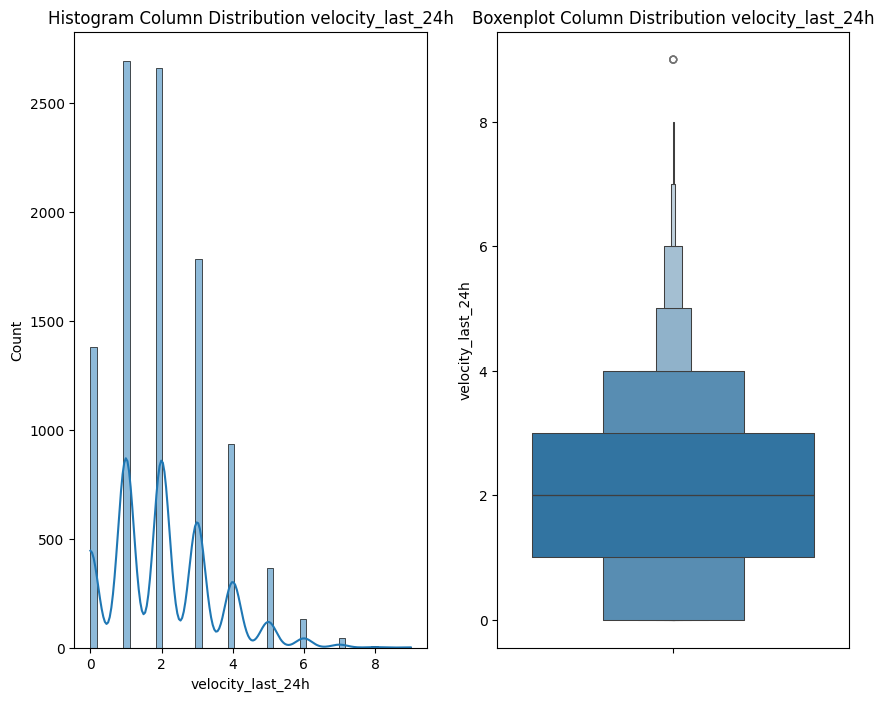

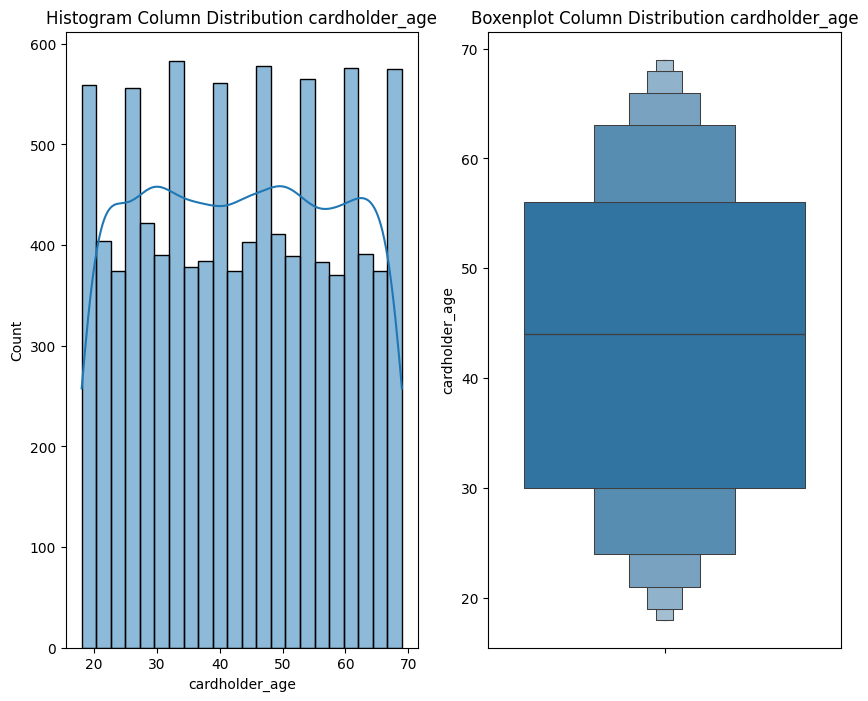

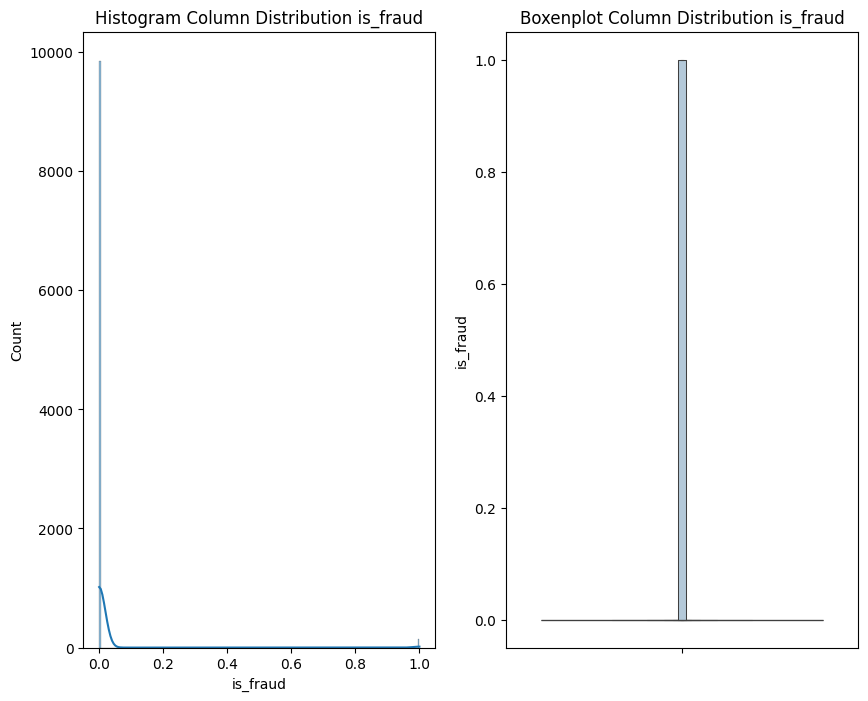

In [12]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Histogram Column Distribution {col}")
    sns.boxenplot(df[col], ax = axes[1])
    axes[1].set_title(f"Boxenplot Column Distribution {col}")

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [17]:
df_clean = df.drop(columns=['transaction_id'])

In [20]:
df_clean.columns

Index(['amount', 'transaction_hour', 'merchant_category',
       'foreign_transaction', 'location_mismatch', 'device_trust_score',
       'velocity_last_24h', 'cardholder_age', 'is_fraud',
       'merchant_category_sign'],
      dtype='object')

### B.2 Mapping Feature

In [18]:
merchant_mapping = {'Electronics' : 0, 'Travel' : 1, 'Grocery' : 2, 'Food' : 3, 'Clothing' : 4}
df_clean['merchant_category_sign'] = df_clean['merchant_category'].map(merchant_mapping)

In [19]:
df_clean.head()

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_sign
0,84.47,22,Electronics,0,0,66,3,40,0,0
1,541.82,3,Travel,1,0,87,1,64,0,1
2,237.01,17,Grocery,0,0,49,1,61,0,2
3,164.33,4,Grocery,0,1,72,3,34,0,2
4,30.53,15,Food,0,0,79,0,44,0,3


## C. Exploratory Data Analysis